In [98]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import datetime as dt
%matplotlib inline

In [52]:
play = pd.read_csv('../working/playlevel/during_play/2016-10-1275.csv')

In [53]:
vr = pd.read_csv('../input/video_review.csv')
vr.columns = [col.lower() for col in vr.columns]

In [54]:
vr.head()

,season_year,gamekey,playid,gsisid,player_activity_derived,turnover_related,primary_impact_type,primary_partner_gsisid,primary_partner_activity_derived,friendly_fire
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482.0,Tackled,No
1,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059.0,Blocking,No
2,2016,29,538,31023,Tackling,No,Helmet-to-body,31941.0,Tackled,No
3,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249.0,Tackled,No
4,2016,54,1045,32444,Blocked,No,Helmet-to-body,31756.0,Blocked,Yes


In [55]:
play.loc[play['injured_player']].role.values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [86]:
injured_and_pp = pd.merge(play[play['injured_player']], play[play['primary_partner_player']], on='time', suffixes=('_injured','_partner'), how='outer')
injured_and_pp['distance'] = np.sqrt(np.square(injured_and_pp['x_injured'] - injured_and_pp['x_partner']) + np.square(injured_and_pp['y_injured'] + injured_and_pp['y_partner']))

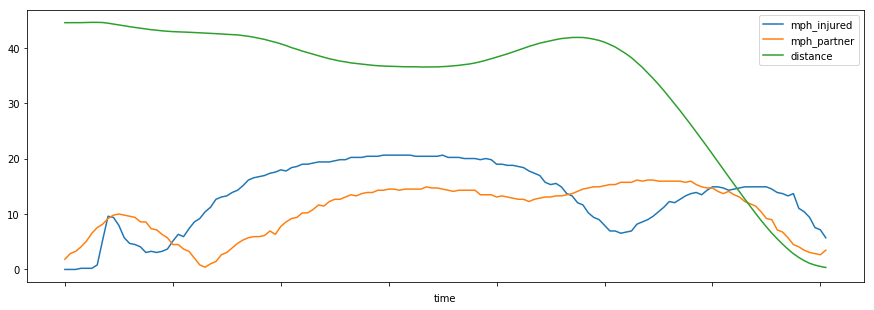

2016-5-3129.csv
Injured Player is position: PLW
Primary Partner is position: PR


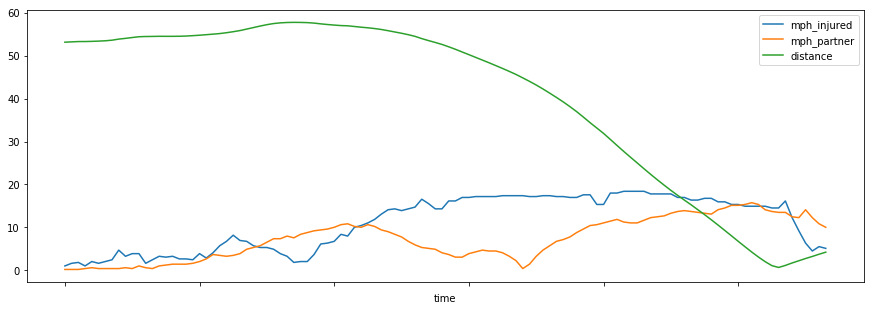

2016-21-2587.csv
Injured Player is position: GL
Primary Partner is position: PLL1


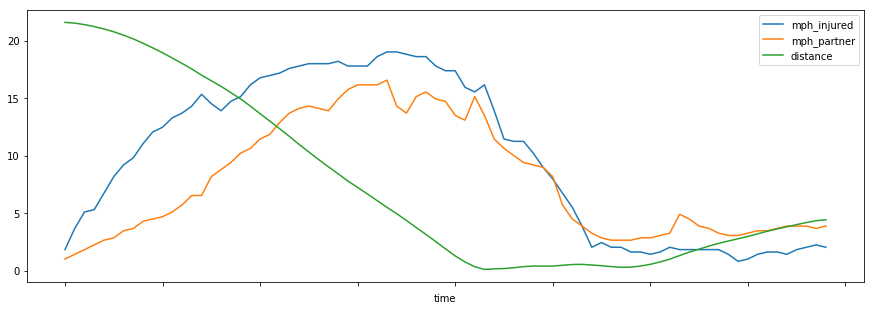

2016-29-538.csv
Injured Player is position: GR
Primary Partner is position: PR


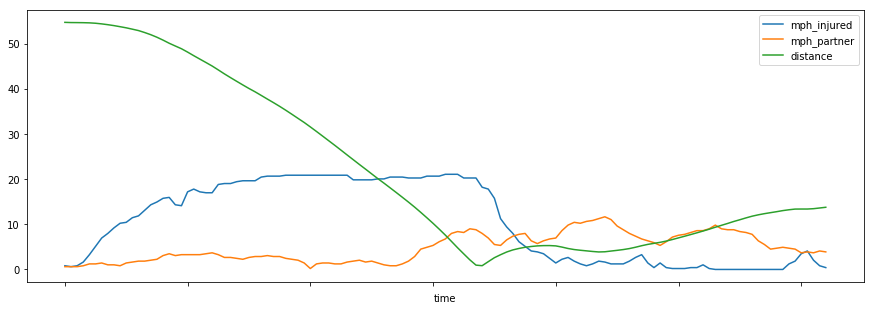

2016-45-1212.csv
Injured Player is position: PRT
Primary Partner is position: PR


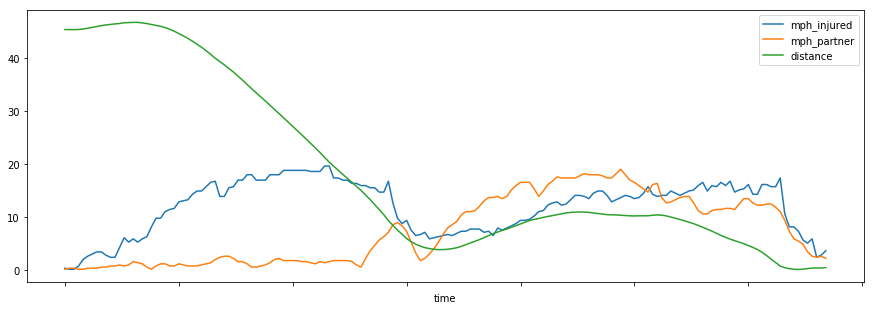

2016-54-1045.csv
Injured Player is position: PRT
Primary Partner is position: GR


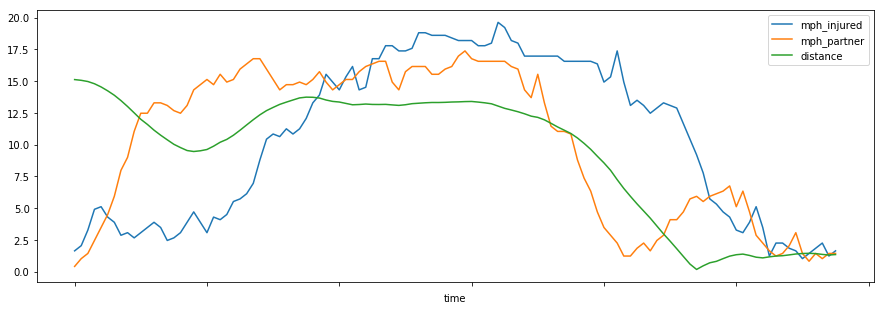

2016-60-905.csv
Injured Player is position: PRW
Primary Partner is position: PDL1


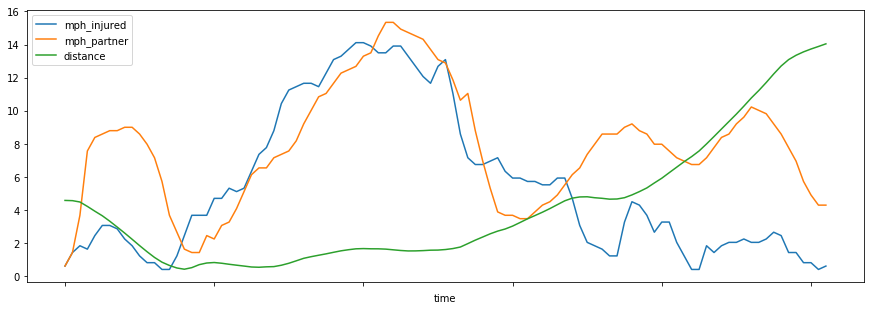

2016-144-2342.csv
Injured Player is position: VR
Primary Partner is position: PLG


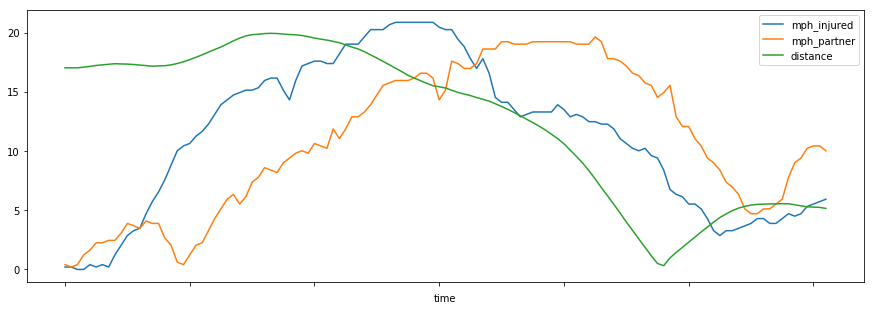

2016-149-3663.csv
Injured Player is position: PFB
Primary Partner is position: PRT


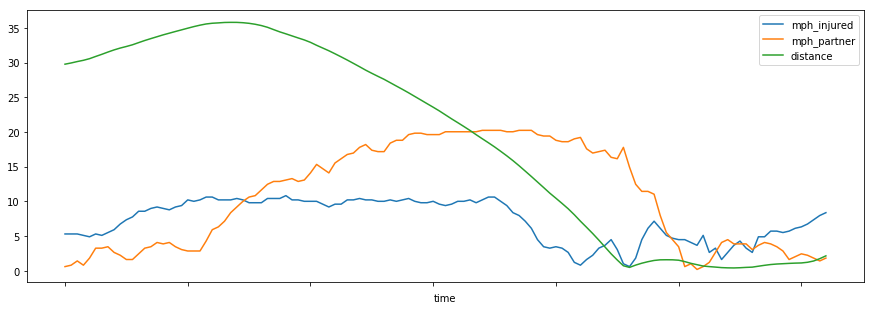

2016-189-3509.csv
Injured Player is position: PR
Primary Partner is position: PRG


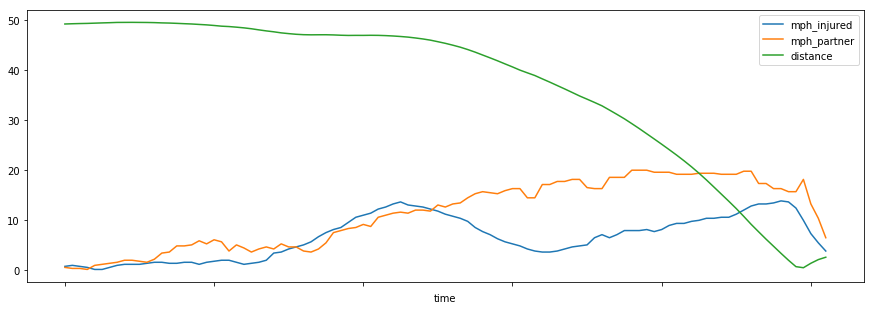

2016-218-3468.csv
Injured Player is position: PLG
No primary partner


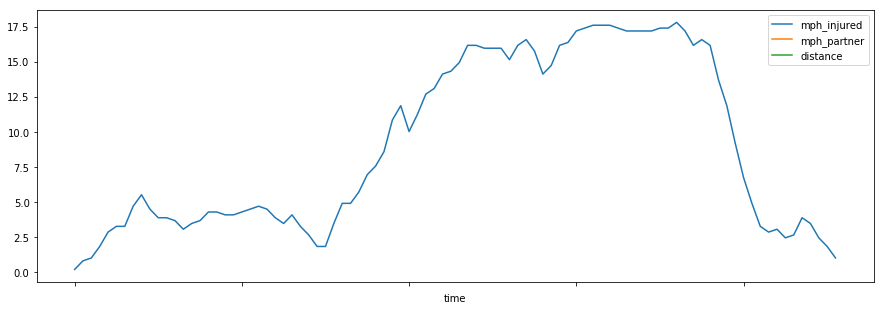

2016-231-1976.csv
Injured Player is position: PLG
Primary Partner is position: PRW


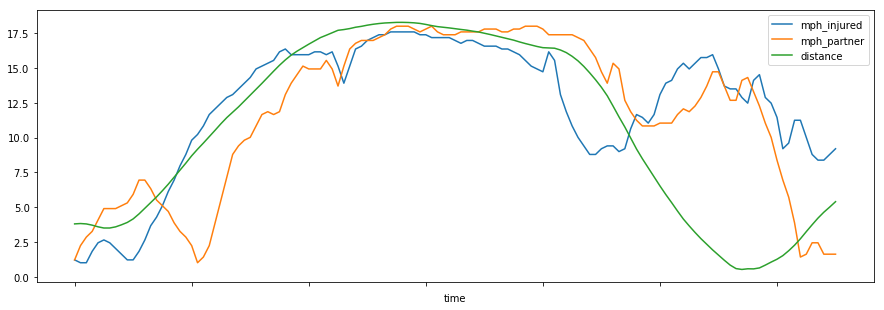

2016-234-3278.csv
Injured Player is position: PRG
Primary Partner is position: PR


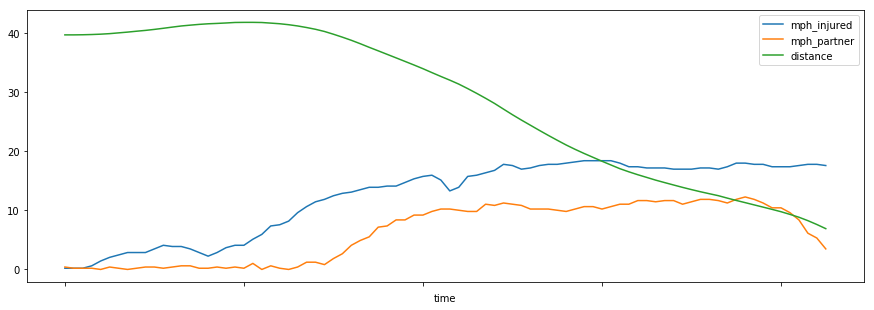

2016-266-2902.csv
Injured Player is position: PR
Primary Partner is position: GR


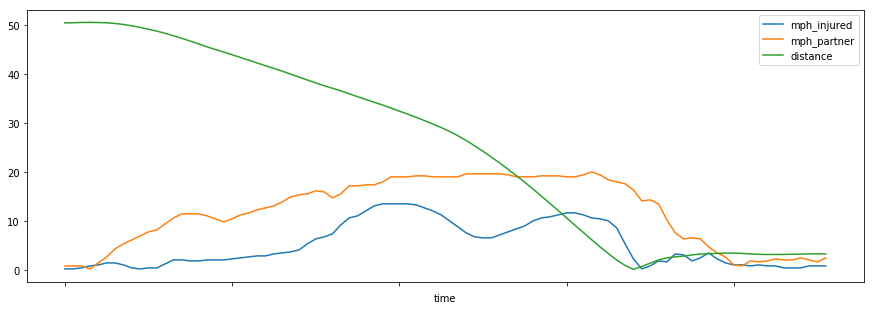

2016-274-3609.csv
Injured Player is position: P
Primary Partner is position: VLo


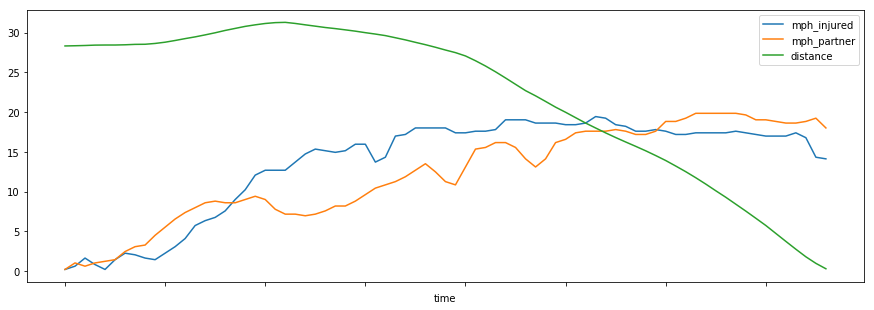

2016-280-2918.csv
Injured Player is position: PLW
Primary Partner is position: PDR1


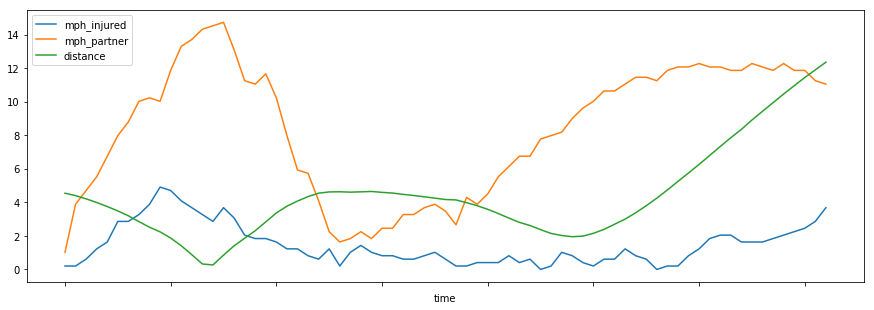

2016-280-3746.csv
Injured Player is position: GL
Primary Partner is position: PR


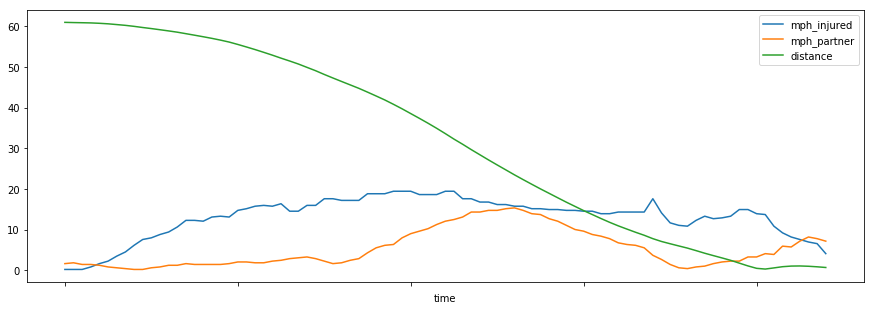

2016-281-1526.csv
Injured Player is position: PLG
Primary Partner is position: PLW


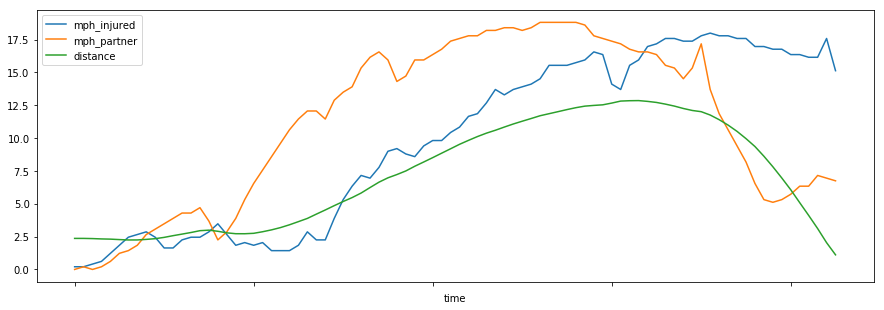

2016-289-2341.csv
Injured Player is position: GL
Primary Partner is position: PDR3


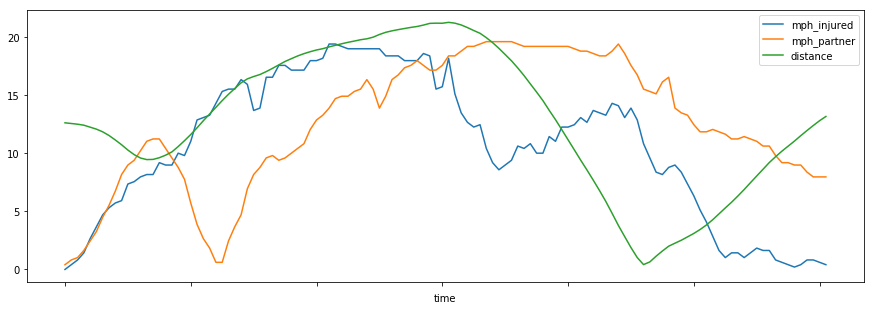

2016-296-2667.csv
Injured Player is position: GL
Primary Partner is position: GR


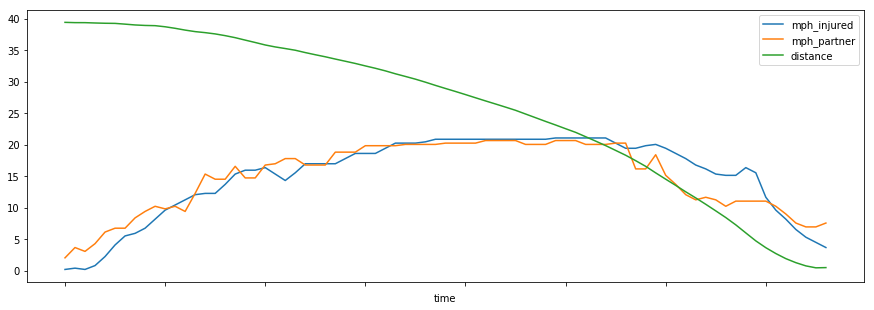

2017-357-3630.csv
Injured Player is position: PRG
Primary Partner is position: PR


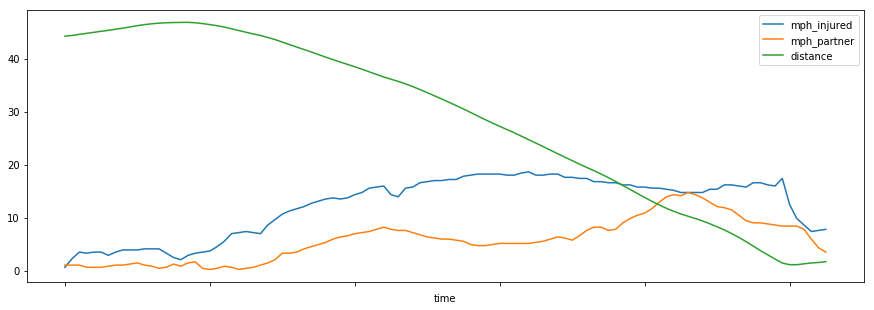

2017-364-2489.csv
Injured Player is position: PLT
Primary Partner is position: PDR2


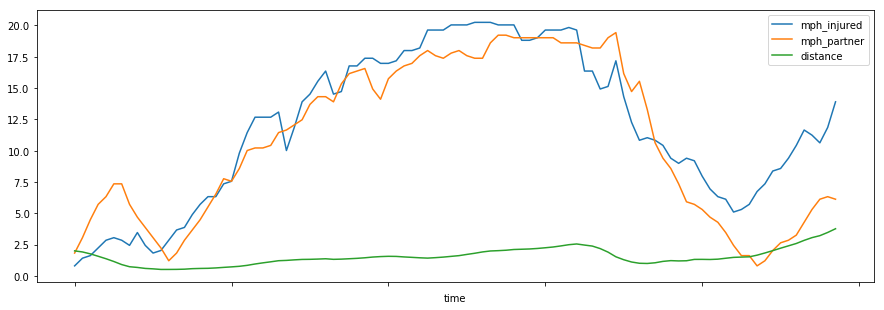

2017-364-2764.csv
Injured Player is position: PLG
Primary Partner is position: PDR1


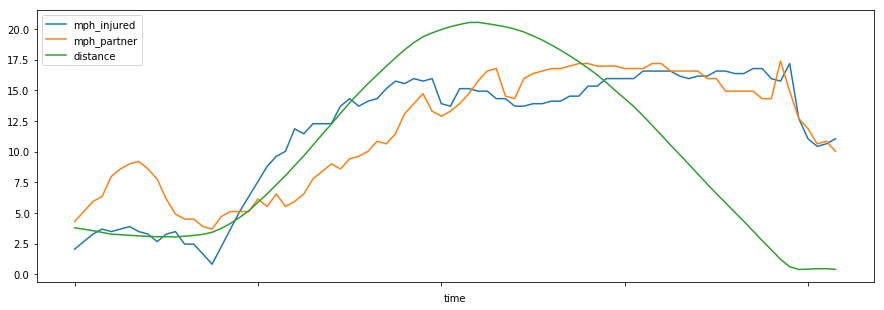

2017-384-183.csv
Injured Player is position: PPR
Primary Partner is position: PLT


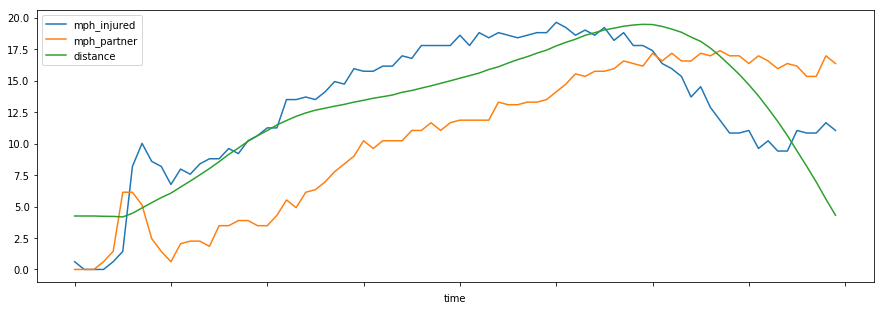

2017-392-1088.csv
Injured Player is position: PLS
Primary Partner is position: PDL1


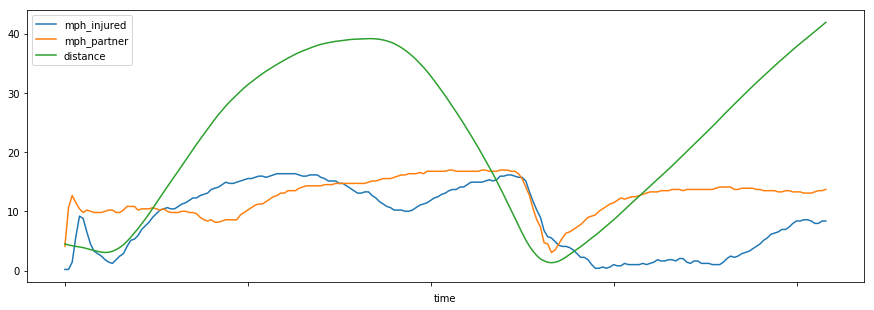

2017-397-1526.csv
Injured Player is position: PLT
Primary Partner is position: PR


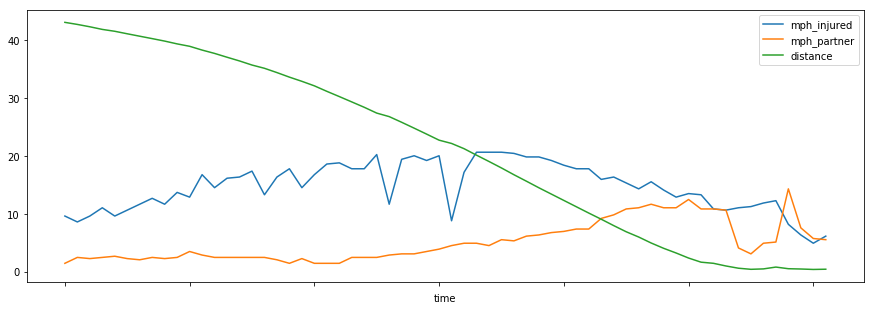

2017-399-3312.csv
Injured Player is position: PR
Primary Partner is position: PRT


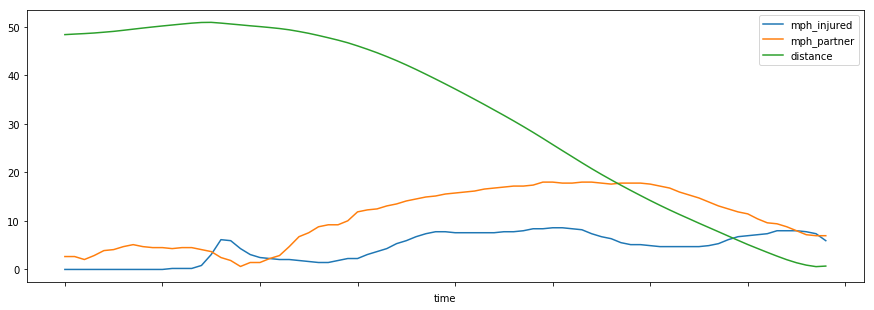

2017-414-1262.csv
Injured Player is position: PLW
No primary partner


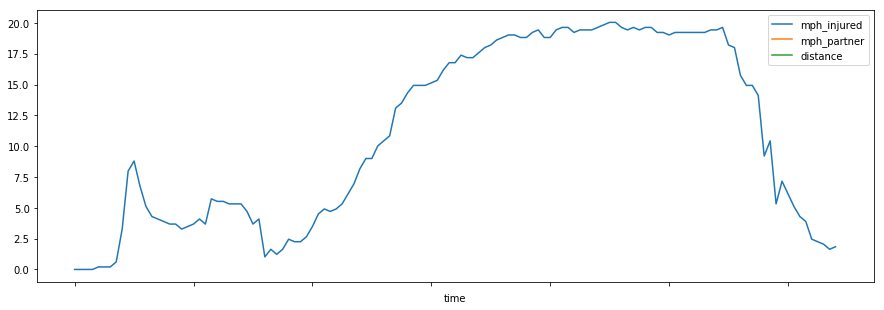

2017-448-2792.csv
Injured Player is position: PDR1
Primary Partner is position: PRG


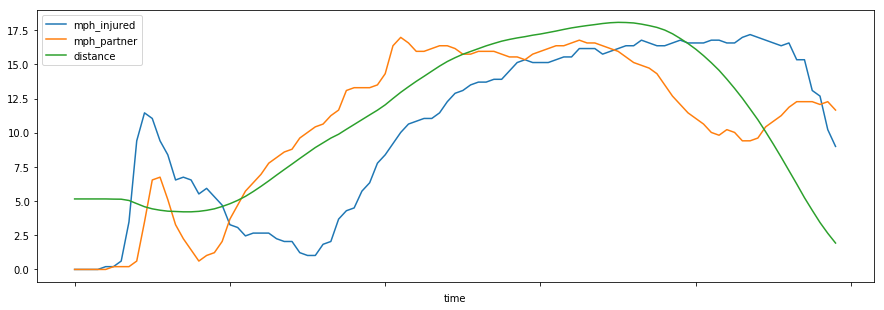

2017-473-2072.csv
Injured Player is position: PRG
Primary Partner is position: PLT


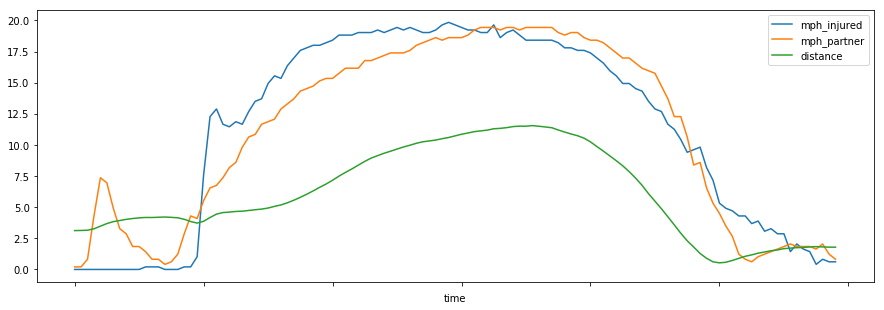

2017-506-1988.csv
Injured Player is position: PR
No primary partner


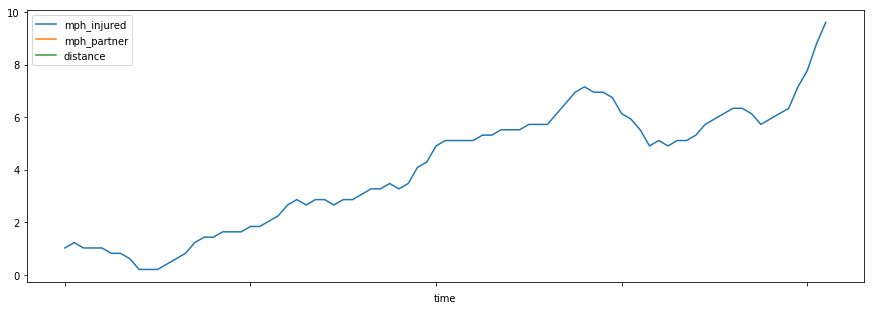

2017-553-1683.csv
Injured Player is position: PDL2
Primary Partner is position: PLS


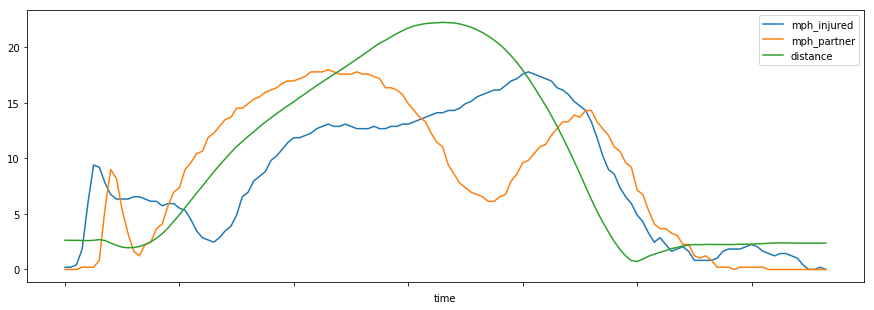

2017-567-1407.csv
Injured Player is position: PLL
Primary Partner is position: GR


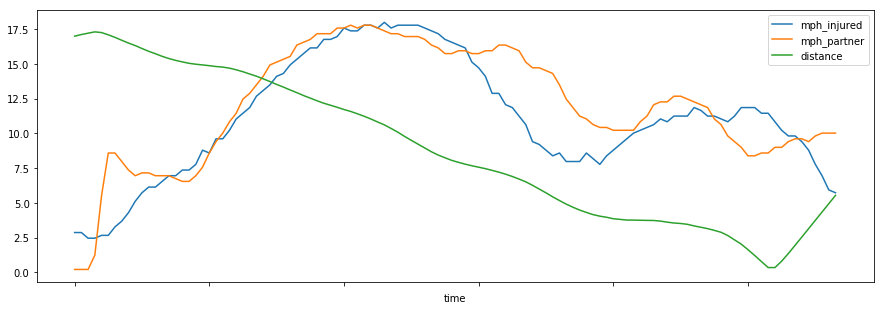

2017-585-2208.csv
Injured Player is position: PR
Primary Partner is position: PPR


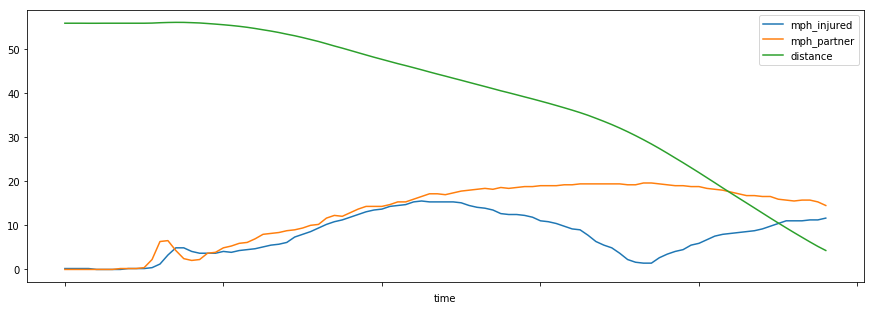

2017-585-733.csv
Injured Player is position: PRW
No primary partner


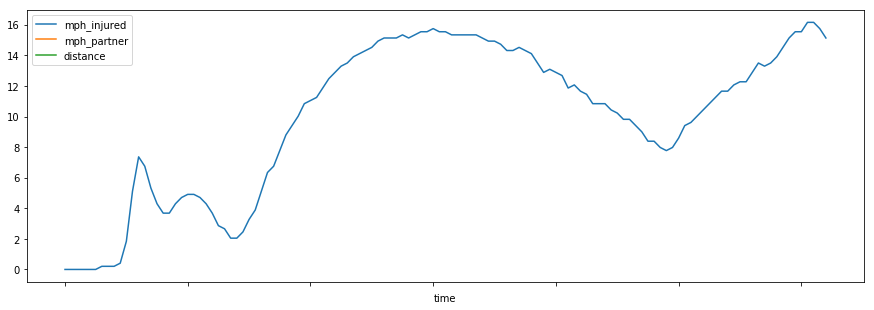

2017-601-602.csv
Injured Player is position: PLS
Primary Partner is position: PR


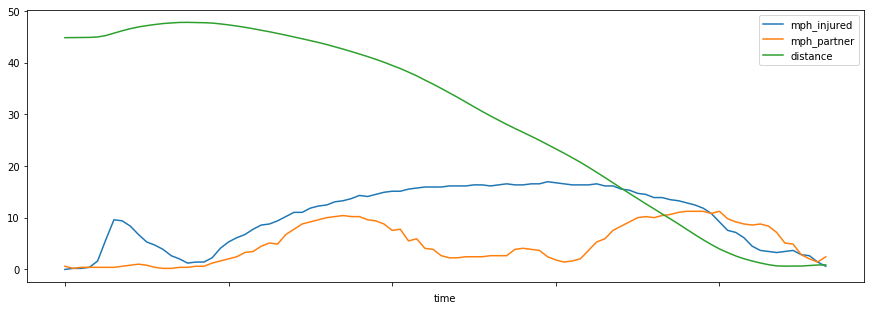

2017-607-978.csv
Injured Player is position: PLW
Primary Partner is position: PDR2


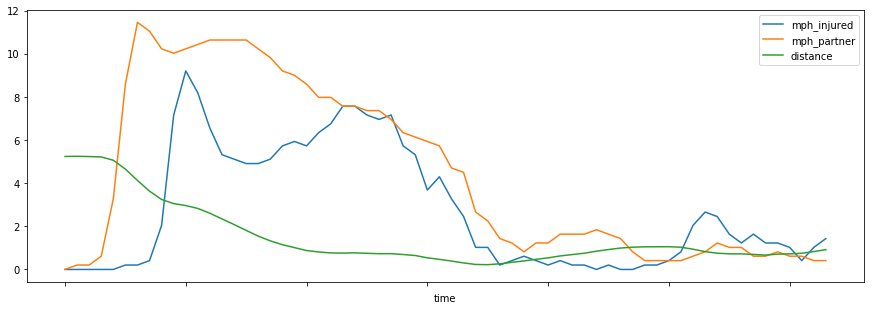

2017-618-2792.csv
Injured Player is position: PRG
Primary Partner is position: PDR1


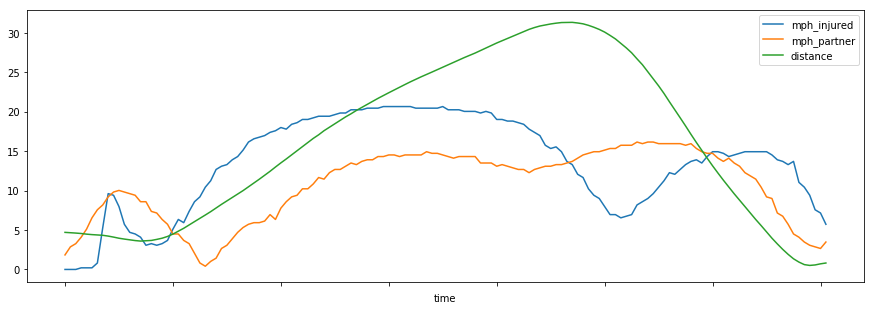

In [111]:
for row in vr.iterrows():
    sy = row[1]['season_year']
    gk = row[1]['gamekey']
    plid = row[1]['playid']
    play = pd.read_csv('../working/playlevel/during_play/{}-{}-{}.csv'.format(sy,
                                                                   gk,
                                                                             plid))
    print('{}-{}-{}.csv'.format(sy,
                                                                   gk,
                                                                             plid))
    print('Injured Player is position: {}'.format(play.loc[play['injured_player']].role.values[0]))
    try:
        print('Primary Partner is position: {}'.format(play.loc[play['primary_partner_player']].role.values[0]))
    except:
        print('No primary partner')
#     play.loc[play['role'] \
#         .isin(['PLG', 'PLT', 'PRG', 'PRT'])] \
#         .pivot(index='time', columns='role', values='mph') \
#         .plot(figsize=(15, 5))
#     play.loc[play['role'] \
#         .isin(['PR', 'GL', 'GR','PLW'])] \
#         .pivot(index='time', columns='role', values='mph') \
#         .plot(figsize=(15, 5))
#     play.loc[play['injured_player'] | play['primary_partner_player']] \
#         .pivot(index='time', columns='role', values='mph') \
#         .plot(figsize=(15, 5))
    injured_and_pp = pd.merge(play[play['injured_player']], play[play['primary_partner_player']], on='time', suffixes=('_injured','_partner'), how='outer')
    injured_and_pp['distance'] = np.sqrt(np.square(injured_and_pp['x_injured'] - injured_and_pp['x_partner']) + np.square(injured_and_pp['y_injured'] - injured_and_pp['y_partner']))
    injured_and_pp.set_index('time').sort_index()[['mph_injured','mph_partner','distance',]].plot(figsize=(15, 5))
    plt.show()

In [106]:
pd.to_datetime(injured_and_pp['time'].min()) + dt.timedelta(minutes=1)

Timestamp('2017-12-17 23:14:22')